In [1]:
import pandas as pd

In [8]:
df = pd.read_csv('/group/ctbrowngrp2/amhorst/2025-pig-corespp/results/pangenome/pangenome.size.tsv',
    sep="\t",
    names=["species", "kmers GTDB", "kmers GTDB+MAG", "kmers novel"],
    header=0)

In [9]:
df.sort_values("kmers novel", ascending=False)


,species,kmers GTDB,kmers GTDB+MAG,kmers novel
17,UBA2868_sp004552595,7344,24695,17351
14,Prevotella_sp002251295,12466,29758,17292
7,JALFVM01_sp022787145,5073,21780,16707
0,Bariatricus_sp004560705,6981,22826,15845
8,Lactobacillus_amylovorus,17138,28151,11013
16,Sodaliphilus_sp004557565,31306,41435,10129
2,Cryptobacteroides_sp900546925,14714,22680,7966
9,Mogibacterium_A_kristiansenii,10715,18310,7595
6,JAFBIX01_sp021531895,6945,13809,6864
1,Butyricicoccus_A_intestinisimiae,11680,18281,6601


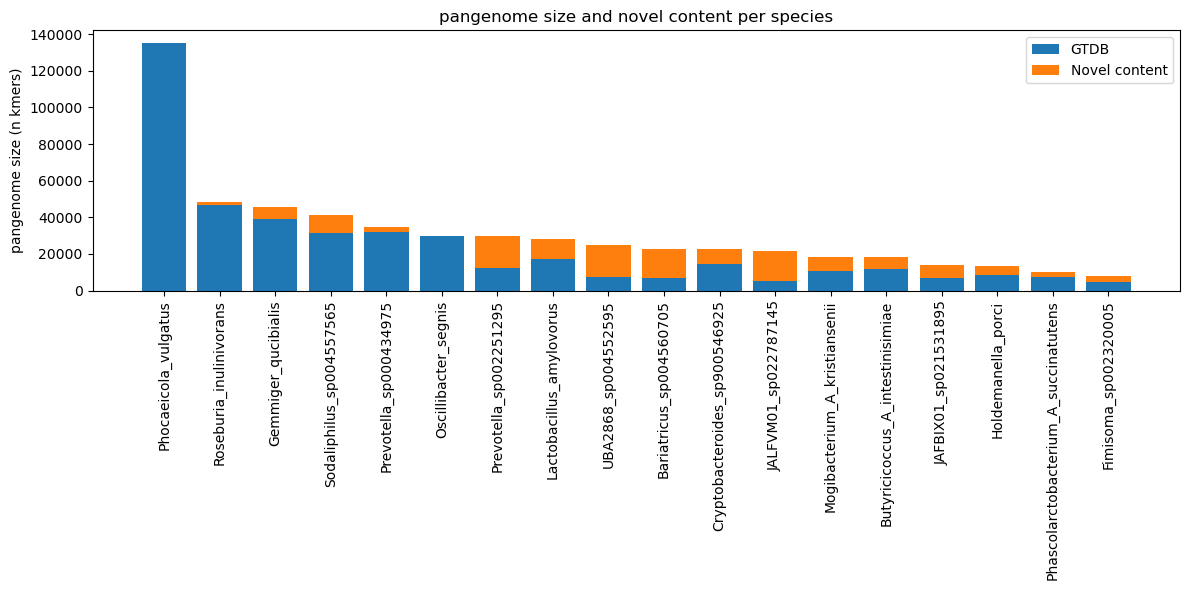

In [16]:
# sort by total size if you like
df = df.sort_values("kmers GTDB+MAG", ascending=False)

# plot
plt.figure(figsize=(12,6))
plt.bar(df["species"], df["kmers GTDB"], label="GTDB")
plt.bar(df["species"], df["kmers novel"], bottom=df["kmers GTDB"], label="Novel content")
plt.xticks(rotation=90)
plt.ylabel("pangenome size (n kmers)")
plt.title("pangenome size and novel content per species")
plt.legend()
plt.tight_layout()
plt.show()

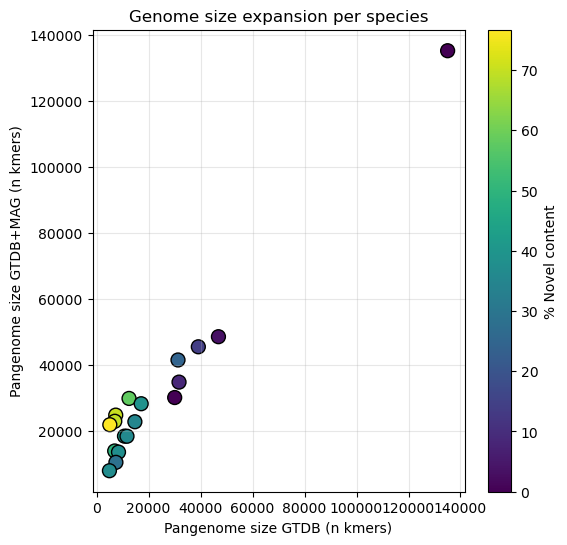

In [21]:
df["percent_novel"] = df["kmers novel"] / df["kmers GTDB+MAG"] * 100

plt.figure(figsize=(6,6))
sc = plt.scatter(
    df["kmers GTDB"],
    df["kmers GTDB+MAG"],
    c=df["percent_novel"],
    cmap="viridis",
    s=100,  # size of points
    edgecolor='k'
)
plt.colorbar(sc, label="% Novel content")
plt.xlabel("Pangenome size GTDB (n kmers)")
plt.ylabel("Pangenome size GTDB+MAG (n kmers)")
plt.title("Genome size expansion per species")
plt.grid(alpha=0.3)
plt.show()